In [15]:
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import datetime
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')


In [16]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index_col='공고게시일자')

In [17]:
df.index = df.index.astype(str)

df.index = pd.to_datetime(df.index)

In [18]:
seoul_city = df[df.수요기관명 == "서울특별시"] # 용역
seoul_city_service = seoul_city[seoul_city.대상 == "용역"]

In [19]:
col_name = ["추정가격"]
seoul_city_service_price = pd.DataFrame(data = seoul_city_service,columns = col_name)

In [20]:
seoul_city_service_price

,추정가격
공고게시일자,
2017-03-31,45272727.00
2017-03-31,227272727.00
2017-03-31,177601818.00
2017-03-30,172124545.00
2017-03-30,174727272.00
...,...
2021-12-23,26754545.00
2021-12-23,10091818.00
2021-12-29,145454545.00


In [21]:
seoul_city_service_price=seoul_city_service_price.sort_index(ascending=True)

Text(0.5, 1.0, '서울특별시 용역 추정가격')

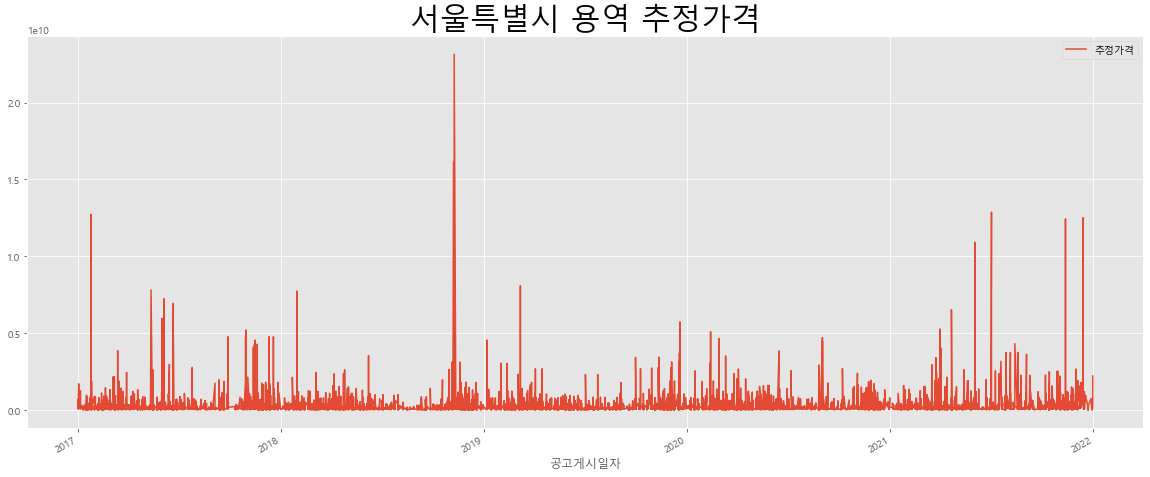

In [22]:
seoul_city_service_price.plot(figsize=(20,8))
plt.title("서울특별시 용역 추정가격",fontsize=30)

In [23]:
seoul_city_service_price=seoul_city_service_price.dropna()
seoul_city_service_price

,추정가격
공고게시일자,
2017-01-02,218181818.00
2017-01-02,702772727.00
2017-01-02,492190909.00
2017-01-02,367121818.00
2017-01-02,90000000.00
...,...
2021-12-30,26754545.00
2021-12-30,33000000.00
2021-12-31,134545454.00


In [24]:
seoul_city_service_price['date'] = seoul_city_service_price.index
seoul_city_service_price.dtypes

seoul_city_service_price['date'] = seoul_city_service_price['date'].astype(str)

seoul_city_service_price['date'] = pd.to_datetime(seoul_city_service_price['date'])

seoul_groups = seoul_city_service_price.groupby(["date"]).추정가격.sum()
seoul_city_ser_group = pd.DataFrame(data=seoul_groups, index = seoul_groups.index)

seoul_city_ser_group.head()

,추정가격
date,
2017-01-02,2143986362.00
2017-01-03,5353588179.00
2017-01-04,740774544.00
2017-01-05,270909090.00
2017-01-06,1470924389.00


In [25]:
seoul_temp =seoul_city_ser_group

Text(0.5, 1.0, '서울특별시 용역 추정가격_day')

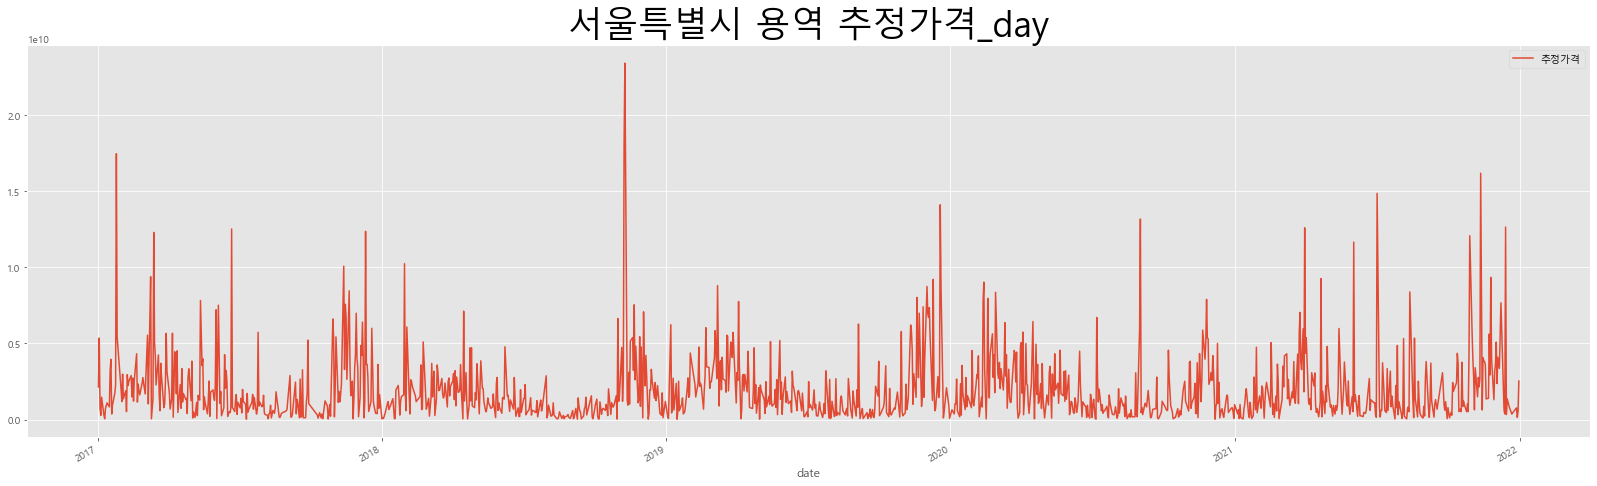

In [26]:
seoul_temp.plot(figsize=(28,8))
plt.title("서울특별시 용역 추정가격_day",fontsize=35)

In [27]:


seoul_temp.dtypes

추정가격    float64
dtype: object

In [28]:
seoul_temp_sample = seoul_temp.resample(rule='w').sum()

In [29]:
seoul_temp_sample.head()

,추정가격
date,
2017-01-08,9980182564.00
2017-01-15,2172948174.00
2017-01-22,9301001640.00
2017-01-29,26864316661.00
2017-02-05,7526443857.00


In [30]:
seoul_temp_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2017-01-08 to 2022-01-02
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   추정가격    261 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [31]:
#보간법인데 null 값이 없어서 안해주었음
#df_resample.interpolate()

Text(0.5, 1.0, '서울특별시 용역 추정가격_week')

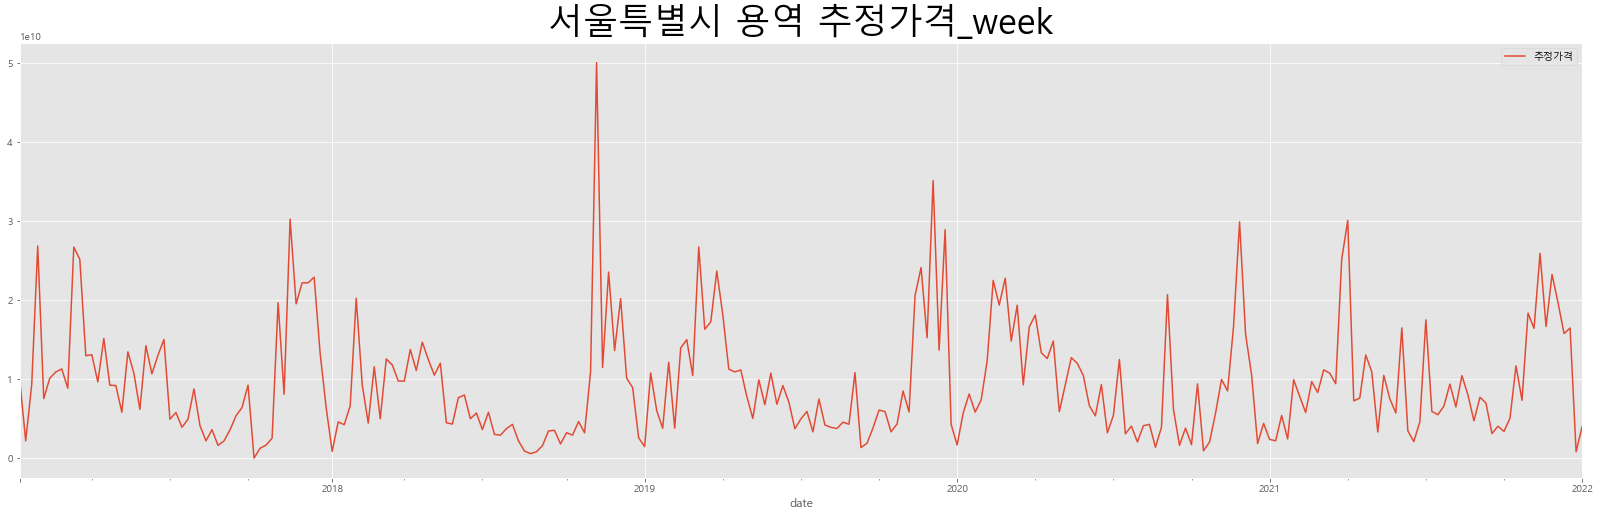

In [32]:
seoul_temp_sample.plot(figsize=(28,8))
plt.title("서울특별시 용역 추정가격_week",fontsize=35)

# 정상성확인

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(seoul_temp_sample[1:])
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -6.473887
p-value : 0.000000
Critical values:
	1%:-3.456
	5%:-2.873
	10%:-2.573


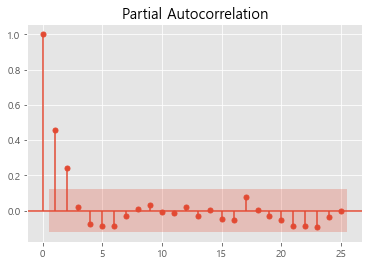

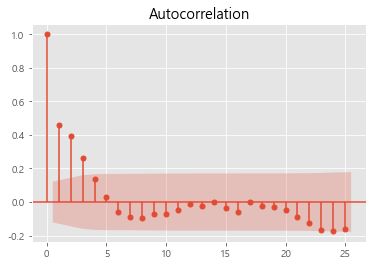

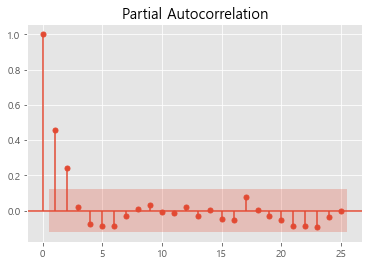

In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seoul_temp_sample.추정가격)
plot_pacf(seoul_temp_sample.추정가격)


In [181]:
seoul_temp_sample

,추정가격
date,
2017-01-08,9980182564.00
2017-01-15,2172948174.00
2017-01-22,9301001640.00
2017-01-29,26864316661.00
2017-02-05,7526443857.00
...,...
2021-12-05,19660980569.00
2021-12-12,15768246326.00
2021-12-19,16472251730.00


# 차분

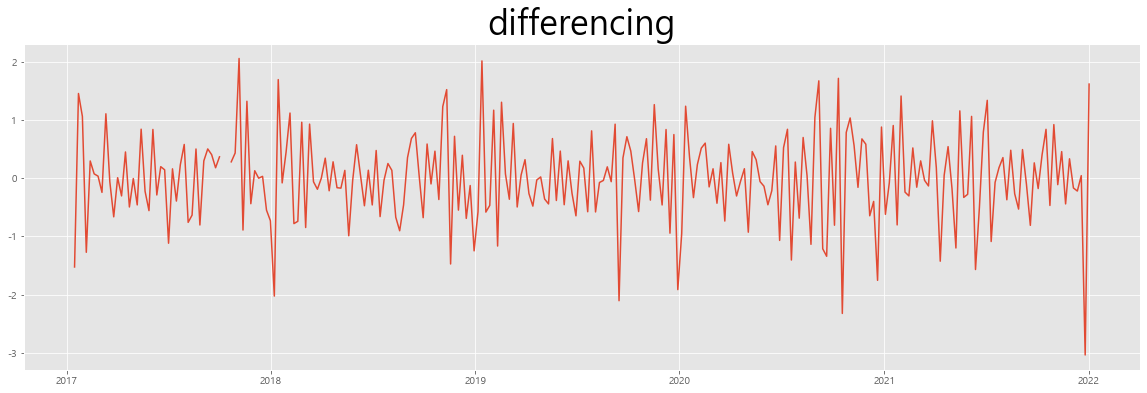

In [35]:
# differencing
#log변환, 차분

#log변환
fig = plt.figure(figsize=(20,6))
seoul_temp_sample_log = np.log(seoul_temp_sample)
#plt.plot(seoul_temp) 
#plt.show()

#차분 
seoul_temp_sample_diff = seoul_temp_sample_log - seoul_temp_sample_log.shift(1)
#seoul_temp_sample_diff = seoul_temp_sample_log[1:] - seoul_temp_sample_log[:-1]

# 결측치 제거
seoul_temp_sample_diff_dropna = seoul_temp_sample_diff.dropna()
#seoul_temp_sample_diff_dropna.추정가격.isnull().values
seoul_temp_sample_diff_dropna.columns

#그래프
plt.plot(seoul_temp_sample_diff_dropna)
plt.title("differencing",fontsize=35)
plt.show()

In [182]:
#log 변환 시킨 dataset
seoul_temp_sample_log = np.log(seoul_temp_sample)
seoul_temp_sample_log

,추정가격
date,
2017-01-08,23.02
2017-01-15,21.50
2017-01-22,22.95
2017-01-29,24.01
2017-02-05,22.74
...,...
2021-12-05,23.70
2021-12-12,23.48
2021-12-19,23.52


In [37]:
seoul_log = seoul_temp_sample_log.replace([np.inf, -np.inf], np.nan).dropna()

In [183]:
seoul_log

,추정가격
date,
2017-01-08,23.02
2017-01-15,21.50
2017-01-22,22.95
2017-01-29,24.01
2017-02-05,22.74
...,...
2021-12-05,23.70
2021-12-12,23.48
2021-12-19,23.52


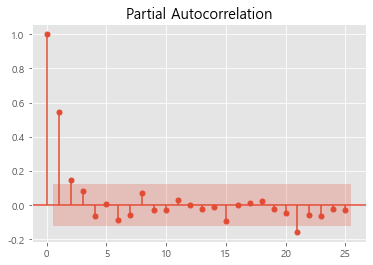

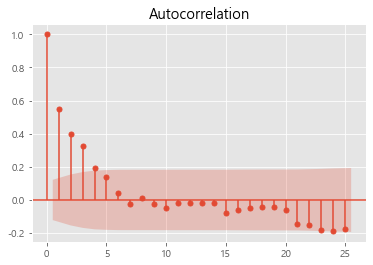

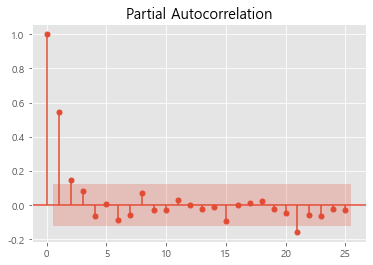

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(seoul_log.추정가격)
plot_pacf(seoul_log.추정가격)

In [40]:
# 1차 차분만해도 시계열이 정상상태를 보이는 것으로 생각되므로 log변환은 안해도 될듯

<AxesSubplot:xlabel='date'>

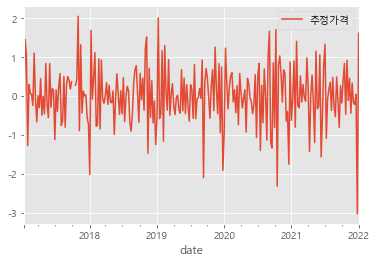

In [41]:
seoul_temp_sample_diff_dropna.plot()

In [198]:
seoul_temp_sample_diff_dropna.dropna() # 생략해도 될듯?

,추정가격
date,
2017-01-15,-1.52
2017-01-22,1.45
2017-01-29,1.06
2017-02-05,-1.27
2017-02-12,0.30
...,...
2021-12-05,-0.17
2021-12-12,-0.22
2021-12-19,0.04


In [46]:
seoul_temp_sample_diff_dropna=seoul_temp_sample_diff_dropna.dropna()
seoul_temp_sample_diff_dropna.shape
#seoul_temp_sample_diff_dropna[seoul_temp_sample_diff_dropna.추정가격==]

(260, 1)

# 로그변환, 차분한걸로 모델돌려보자 

In [36]:
!pip install --upgrade pandas

In [250]:
seoul_log

,추정가격
date,
2017-01-08,23.02
2017-01-15,21.50
2017-01-22,22.95
2017-01-29,24.01
2017-02-05,22.74
...,...
2021-12-05,23.70
2021-12-12,23.48
2021-12-19,23.52


In [251]:
print(seoul_log.shape)
train=seoul_log.iloc[:-150]
test=seoul_log.iloc[-150:]
print(train.shape,test.shape)

(260, 1)
(110, 1) (150, 1)


In [252]:
from pmdarima import auto_arima
seoul_city_service_price_fit = auto_arima(seoul_log, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=544.616, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=635.796, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=545.783, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=573.365, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2363.554, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=543.037, Time=0.72 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=560.530, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=541.110, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=543.069, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=541.826, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=573.391, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.987 seconds


In [253]:
seoul_log.iloc[70:120]

,추정가격
date,
2018-05-20,22.22
2018-05-27,22.18
2018-06-03,22.76
2018-06-10,22.80
2018-06-17,22.33
2018-06-24,22.47
2018-07-01,22.01
2018-07-08,22.48
2018-07-15,21.82


In [56]:
seoul_log.iloc[:-209].shape

(52, 1)

In [287]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train, order=(3,2,0))
model_fit=model.fit(disp=0)#(trend='nc',full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D2.추정가격   No. Observations:                  108
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -138.988
Method:                       css-mle   S.D. of innovations              0.872
Date:                Fri, 18 Feb 2022   AIC                            287.975
Time:                        00:34:57   BIC                            301.386
Sample:                             2   HQIC                           293.413
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.030      0.056      0.955      -0.057       0.060
ar.L1.D2.추정가격    -0.9806      0.096    -10.222      0.000      -1.169      -0.793
ar.L2.D2.추정가격    -0.6420      0.121     

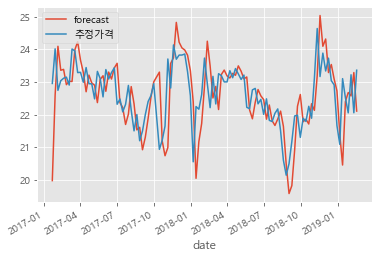

In [288]:
#start_index = datetime(2017,1,8)
#end_index = datetime(2017,5,28)
predic=model_fit.plot_predict(dynamic=False)
#plt.plot(seoul_temp_sample, label='solid ticket')
plt.show()

In [265]:
#forcast_df = pd.DataFrame(data = forcast,index=test_temp.index)
#forcast_df


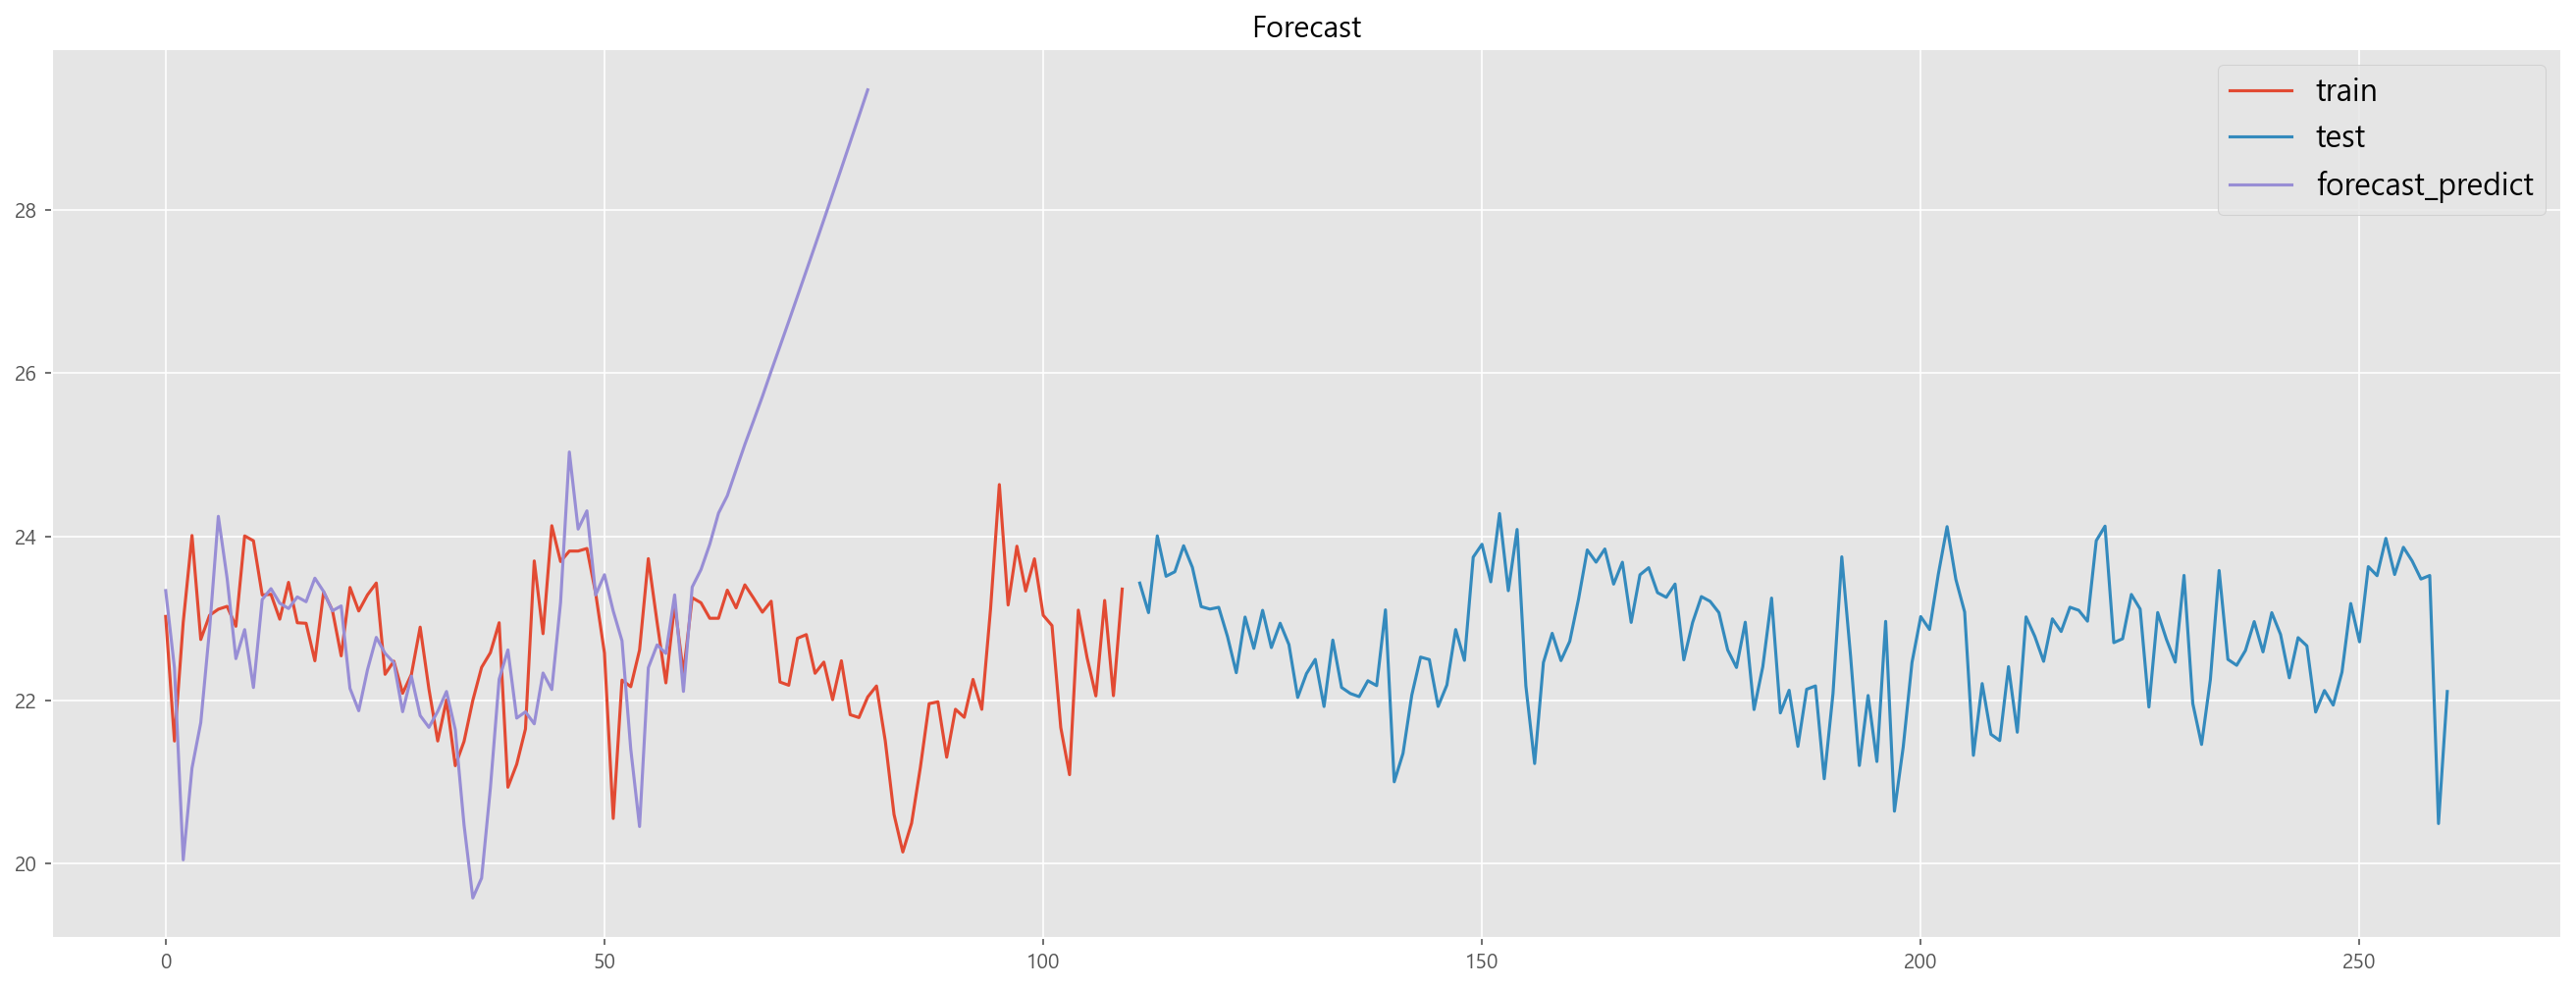

In [293]:
x_train_range = np.arange(len(train))
x_test_range = np.arange(111,261)

#len(forcast)
test_temp = pd.DataFrame(test['추정가격'].values, index=x_test_range)
train_temp = pd.DataFrame(train['추정가격'].values, index=x_train_range)
forcast = model_fit.predict(start=50, end=130,typ='levels')




forcast_index = np.arange(len(forcast))
forcast_df=pd.DataFrame(forcast.values,index=forcast_index)
forcast_df





plt.figure(figsize=(22,8), dpi=150)
plt.plot(train_temp, label='train')
plt.plot(test_temp, label ="test")
plt.plot(forcast_df, label='forecast_predict')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [281]:
def forecast_one_step():
    fore = model_fit.forecast(steps=1)        # 신뢰구간 출력
    #print(fc)
    return fore

In [282]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []
test_val = test.values

for new_ob in test_val:
    fc = forecast_one_step()
    y_pred.append(fc)

    ## 모형 업데이트 !!
    #print(new_ob)
    model.update(new_ob)

AttributeError: 'ARIMA' object has no attribute 'update'

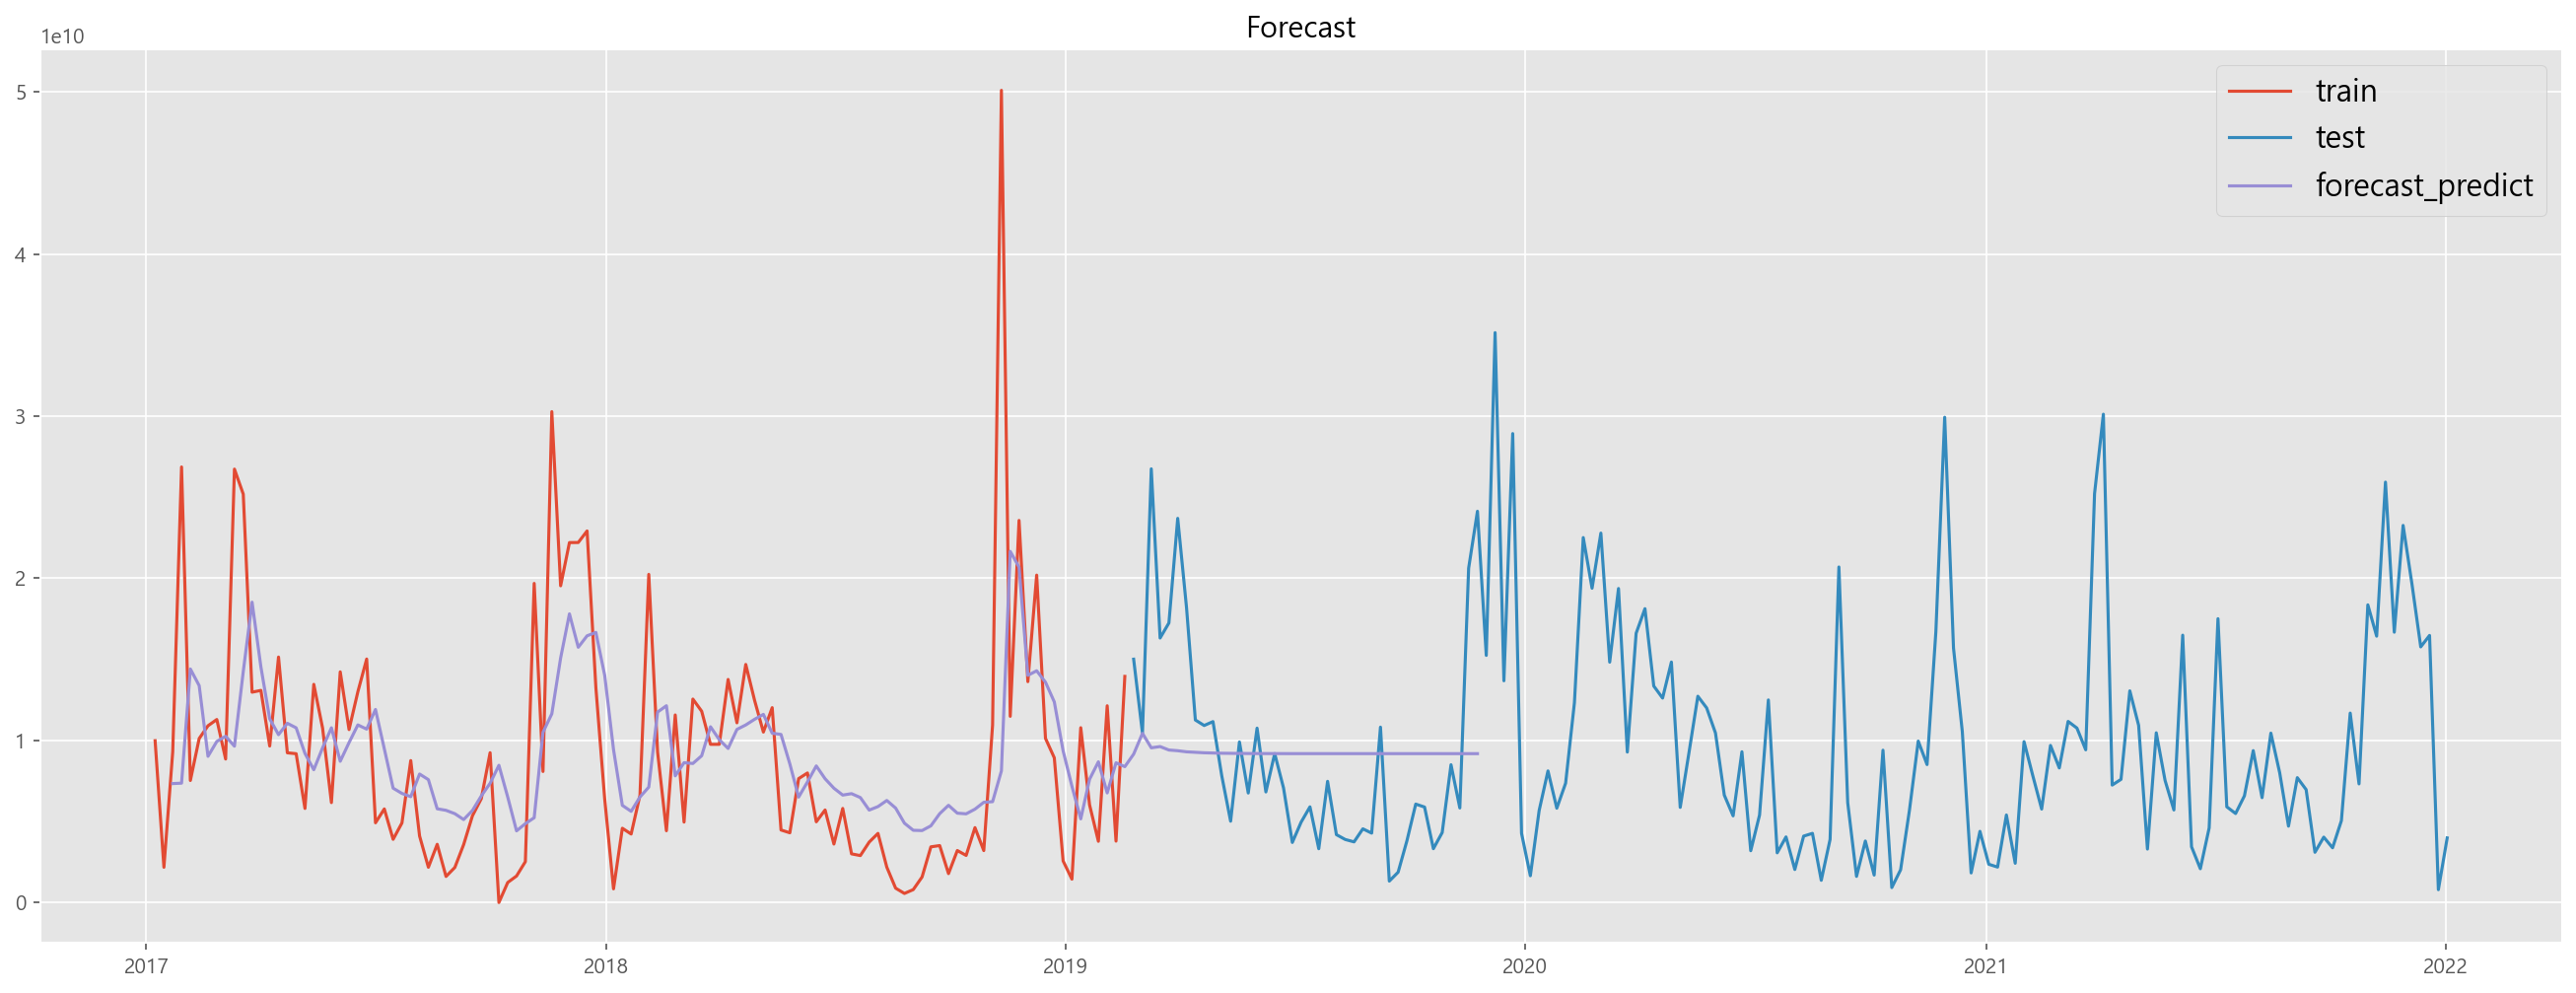

In [228]:
from pandas import datetime
#model = ARIMA(seoul_temp, order=(4,2,0))  
#model_fit = model.fit(disp=0)  

# Predict
#start_index = datetime(2018,5,13)
#end_index = datetime(2019,4,21)




forcast = model_fit.predict(start=2, end=150,typ='levels')



# Plot
plt.figure(figsize=(22,8), dpi=150)
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(forcast, label='forecast_predict')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [63]:
print(seoul_temp_sample.shape)
train=seoul_temp_sample.iloc[:-150]
test=seoul_temp_sample.iloc[-150:]
print(train.shape,test.shape)

(261, 1)
(111, 1) (150, 1)


In [64]:
seoul_temp_sample.index
seoul_temp_sample.values

array([[9.98018256e+09],
       [2.17294817e+09],
       [9.30100164e+09],
       [2.68643167e+10],
       [7.52644386e+09],
       [1.01155816e+10],
       [1.09013536e+10],
       [1.12878373e+10],
       [8.84810581e+09],
       [2.67316327e+10],
       [2.51879045e+10],
       [1.29728510e+10],
       [1.30827458e+10],
       [9.65083084e+09],
       [1.51392198e+10],
       [9.23349399e+09],
       [9.17830329e+09],
       [5.80111363e+09],
       [1.34567623e+10],
       [1.07552489e+10],
       [6.16138126e+09],
       [1.42267013e+10],
       [1.06660679e+10],
       [1.30006318e+10],
       [1.50184191e+10],
       [4.91664090e+09],
       [5.77231810e+09],
       [3.89771083e+09],
       [4.90621636e+09],
       [8.75511159e+09],
       [4.10201279e+09],
       [2.17449272e+09],
       [3.58950817e+09],
       [1.60717909e+09],
       [2.16262592e+09],
       [3.57322636e+09],
       [5.35223008e+09],
       [6.40270685e+09],
       [9.23979587e+09],
       [0.00000000e+00],


In [65]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array(seoul_log.index)
y = np.array(seoul_log.values)
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [66]:
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [ 88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61 

In [67]:
from pmdarima import auto_arima
seoul_city_service_price_fit = auto_arima(y_train, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=453.095, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=537.311, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=453.279, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=481.895, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1972.468, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=450.880, Time=0.84 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=466.836, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=449.098, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=450.962, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=449.327, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=476.394, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 3.418 seconds


In [69]:
#from pandas import datetime
model = ARIMA(y_train[1:], order=(1,0,0))  
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  216
Model:                     ARMA(1, 0)   Log Likelihood                -250.555
Method:                       css-mle   S.D. of innovations              0.760
Date:                Thu, 17 Feb 2022   AIC                            505.109
Time:                        16:44:23   BIC                            511.860
Sample:                             0   HQIC                           507.836
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9994      0.001   1297.477      0.000       0.998       1.001
                                    Roots                                    
                  Real          Imaginary           M

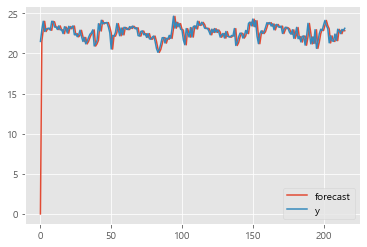

In [70]:
predic=model_fit.plot_predict(dynamic=False)
#plt.plot(seoul_temp_sample, label='solid ticket')
plt.show()

## 아래 코드는 순서대로 예측값, stderr(오류값), upperbound(상한), lowerbound (하한)

<AxesSubplot:>

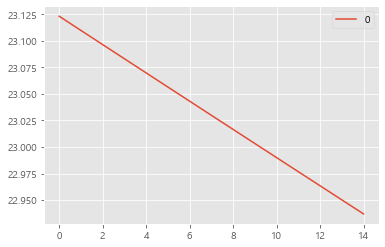

In [71]:
fore = model_fit.forecast(steps=15)
#print(fore)
#print(fore[0])
predict_list= pd.DataFrame(fore[0])
predict_list.plot()

In [72]:
np.expm1(seoul_log)

,추정가격
date,
2017-01-08,9980182563.00
2017-01-15,2172948173.00
2017-01-22,9301001639.00
2017-01-29,26864316660.00
2017-02-05,7526443856.00
...,...
2021-12-05,19660980568.00
2021-12-12,15768246325.00
2021-12-19,16472251729.00


In [73]:
y_pred_df = pd.DataFrame(y_predict,index=seoul_217.index)
y_pred_df[1:].plot()
y_pred_df

NameError: name 'y_predict' is not defined

In [74]:
res =np.expm1(y_pred_df)
res[1:].plot()
res

NameError: name 'y_pred_df' is not defined

<AxesSubplot:xlabel='date'>

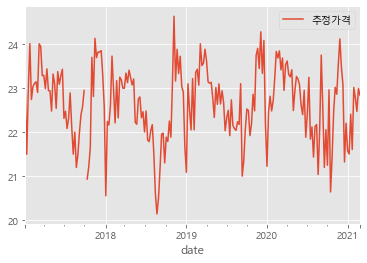

In [75]:
seoul_217=seoul_temp_sample[:217]
seoul_217
tmp = np.log(seoul_217)
tmp.plot()

In [76]:
tmpp = np.exp2(seoul_217)
tmpp

,추정가격
date,
2017-01-08,inf
2017-01-15,inf
2017-01-22,inf
2017-01-29,inf
2017-02-05,inf
...,...
2021-01-31,inf
2021-02-07,inf
2021-02-14,inf


In [77]:
from sklearn.preprocessing import StandardScaler
len(y_train)

217

In [86]:
x_train_range = np.arange(len(X_train))
x_test_range = np.arange(len(X_train),260)

#len(forcast)
test_temp = pd.DataFrame(y_test, index=x_test_range)
train_temp = pd.DataFrame(y_train, index=x_train_range)

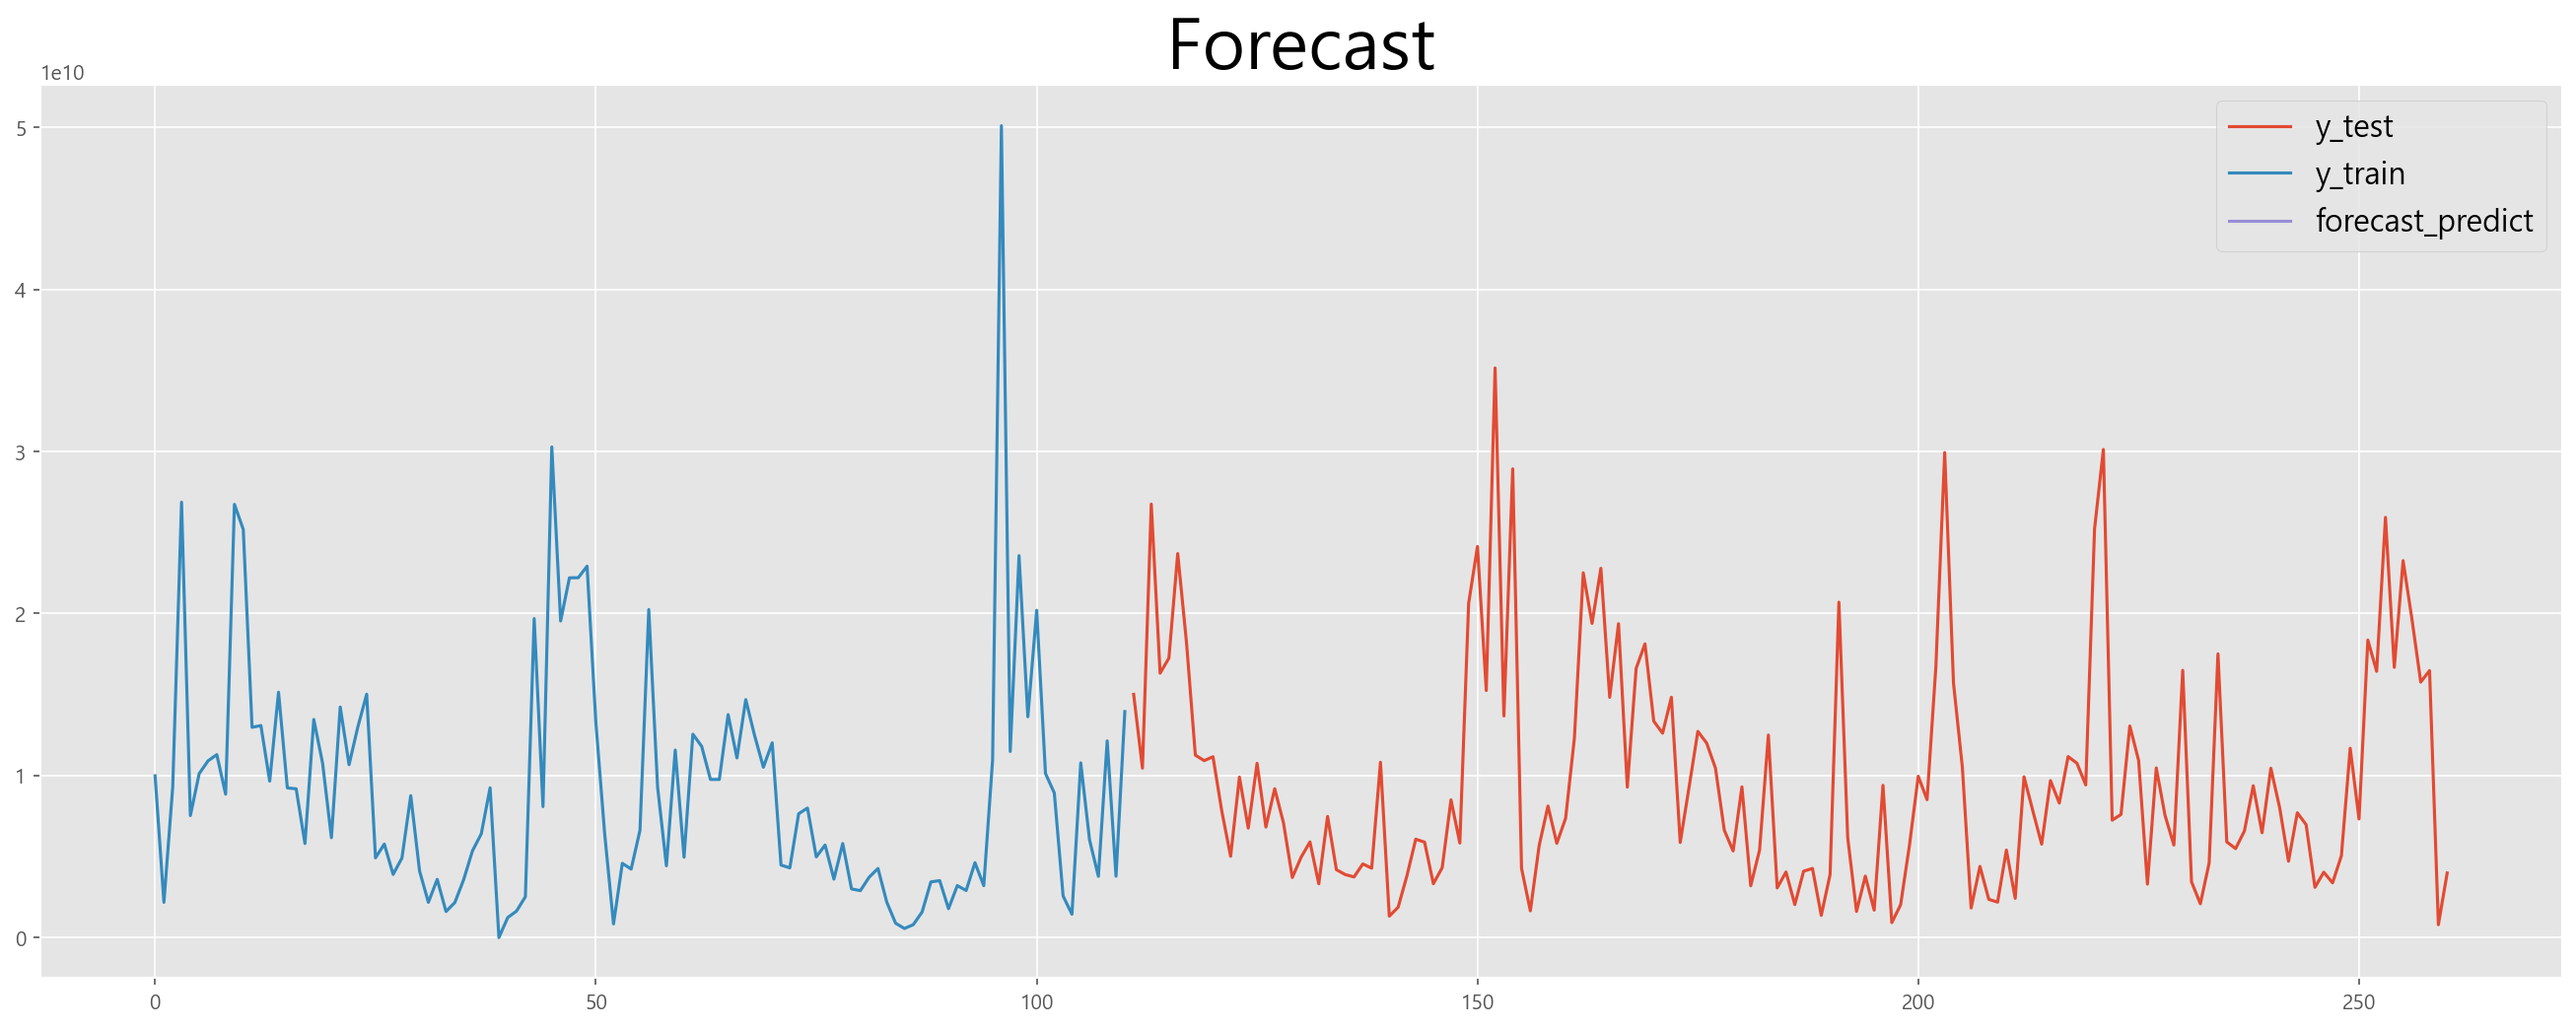

In [195]:
plt.figure(figsize=(22,8), dpi=150)
plt.plot(test_temp,label='y_test')
plt.plot(train_temp,label="y_train")

start_num = 2
end_num = 30
full_range = np.arange(start_num,end_num)

forcast = model_fit.predict(start=start_num-1, end=end_num-2 ,typ='levels')

forcast_df = pd.DataFrame(forcast, index=full_range)
plt.plot(forcast_df, label='forecast_predict')
plt.title('Forecast',fontsize=35)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [197]:
# Predict
start_index = X_test[1]
#datetime(2018,5,13)
end_index = X_test[-1]
#datetime(2019,4,21)


start_num = 200
end_num = 250
full_range = np.arange(start_num,end_num+2)

forcast = model_fit.predict(start=start_num, end=end_num-1 ,typ='levels')

forcast_df = pd.DataFrame(forcast, index=full_range)




# Plot
plt.figure(figsize=(22,8), dpi=150)
#plt.plot(seoul_temp_sample, label='seoul_temp_sample')


plt.plot(x_train_range, y_train, label='y_train')
plt.plot(test_temp, label='y_test')



plt.plot(forcast_df, label='forecast_predict')
plt.title('Forecast',fontsize=35)
plt.legend(loc='upper right', fontsize=15)
plt.show()

ValueError: Length of values (139) does not match length of index (50)

In [89]:
a = forcast_df
a

,0
2,21.49
3,22.94
4,24.00
5,22.73
6,23.02
...,...
253,22.65
254,22.63
255,22.62
256,22.61


In [191]:
test_temp

,0
111,15007247252.00
112,10453598160.00
113,26747887239.00
114,16313804303.00
115,17242788331.00
...,...
256,19660980569.00
257,15768246326.00
258,16472251730.00
259,791719088.00


In [190]:
tmpp = np.exp2(forcast_df)
tmpp
test_tmpp = pd.concat([tmpp,test_temp],axis=1)
test_tmpp

,0,0
218,9135859.93,10758558420.00
219,9051758.47,9417553623.00
220,8968479.09,25218722205.00
221,8886013.30,30117391792.00
222,8804352.71,7242479071.00
...,...,...
256,NaN,19660980569.00
257,NaN,15768246326.00
258,NaN,16472251730.00
259,NaN,791719088.00


In [90]:
y_test_df = pd.DataFrame(y_test,index=x_test_range)
#y_test_df

In [91]:
col = ['predict','real']
temp = pd.concat([a,y_test_df],axis=1)
temp

,0,0
2,21.49,NaN
3,22.94,NaN
4,24.00,NaN
5,22.73,NaN
6,23.02,NaN
...,...,...
255,22.62,23.70
256,22.61,23.48
257,22.60,23.52
258,NaN,20.49


In [92]:
start_index

numpy.datetime64('2021-03-21T00:00:00.000000000')

In [93]:
#X_train

In [94]:
# https://predictor-ver1.tistory.com/3
# https://velog.io/@euisuk-chung/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%8B%9C%EA%B3%84%EC%97%B4-AR-MA-ARMA-ARIMA%EC%9D%98-%EB%AA%A8%EB%93%A0-%EA%B2%83-%EC%8B%A4%EC%8A%B5%ED%8E%B8

In [95]:
X_train

array(['2017-01-08T00:00:00.000000000', '2017-01-15T00:00:00.000000000',
       '2017-01-22T00:00:00.000000000', '2017-01-29T00:00:00.000000000',
       '2017-02-05T00:00:00.000000000', '2017-02-12T00:00:00.000000000',
       '2017-02-19T00:00:00.000000000', '2017-02-26T00:00:00.000000000',
       '2017-03-05T00:00:00.000000000', '2017-03-12T00:00:00.000000000',
       '2017-03-19T00:00:00.000000000', '2017-03-26T00:00:00.000000000',
       '2017-04-02T00:00:00.000000000', '2017-04-09T00:00:00.000000000',
       '2017-04-16T00:00:00.000000000', '2017-04-23T00:00:00.000000000',
       '2017-04-30T00:00:00.000000000', '2017-05-07T00:00:00.000000000',
       '2017-05-14T00:00:00.000000000', '2017-05-21T00:00:00.000000000',
       '2017-05-28T00:00:00.000000000', '2017-06-04T00:00:00.000000000',
       '2017-06-11T00:00:00.000000000', '2017-06-18T00:00:00.000000000',
       '2017-06-25T00:00:00.000000000', '2017-07-02T00:00:00.000000000',
       '2017-07-09T00:00:00.000000000', '2017-07-16

In [96]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = X_train, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = X_test, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = X_test, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

NameError: name 'y_pred' is not defined

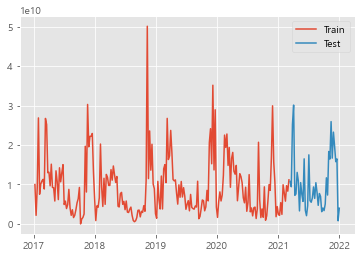